In [56]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('C:/Users/YASH/Downloads/air.csv')

In [4]:
df.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Patna,"DRM Office Danapur, Patna - BSPCB",08-12-2024 11:00:00,25.586562,85.043586,OZONE,7.0,146.0,14.0
1,India,Chhattisgarh,Chhal,"Nawapara SECL Colony, Chhal - CECB",08-12-2024 11:00:00,22.118125,83.140608,OZONE,18.0,70.0,21.0
2,India,Chhattisgarh,Kunjemura,"OP Jindal School, Kunjemura - CECB",08-12-2024 11:00:00,22.126650,83.483212,OZONE,13.0,15.0,14.0
3,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",08-12-2024 11:00:00,26.108870,91.589544,OZONE,18.0,21.0,20.0
4,India,Assam,Nagaon,"Christianpatty, Nagaon - PCBA",08-12-2024 11:00:00,26.349082,92.684490,OZONE,8.0,20.0,17.0


In [57]:
# Summary Statistics for Numeric Columns

df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,207.000000,207.000000,198.000000,198.000000,198.000000
mean,23.194988,79.183586,15.075758,60.691919,22.106061
std,6.105481,4.777840,16.046864,52.221327,20.087976
min,8.514909,72.456691,1.000000,1.000000,1.000000
25%,17.329155,76.777021,4.000000,23.000000,10.000000
50%,25.427420,77.250515,10.000000,41.000000,17.000000
75%,28.563019,81.936844,21.000000,84.000000,28.000000
max,34.066206,94.636574,115.000000,266.000000,134.000000


In [58]:
# Count unique pollutants

unique_pollutants = df['pollutant_id'].unique()
unique_pollutants


array(['OZONE', 'CO', 'SO2', 'PM2.5', 'PM10', 'NO2'], dtype=object)

In [59]:
# Finding Missing Values

df.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    9
pollutant_max    9
pollutant_avg    9
dtype: int64

In [60]:
# Imputing Values to the Data

from sklearn.impute import SimpleImputer  # Importing SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(df[['pollutant_min']])

df[['pollutant_min']] = imputer.transform(df[['pollutant_min']])


imputer.fit(df[['pollutant_max']])

df[['pollutant_max']] = imputer.transform(df[['pollutant_max']])


imputer.fit(df[['pollutant_avg']])

df[['pollutant_avg']] = imputer.transform(df[['pollutant_avg']])


df.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [62]:
# Grouping by state and calculating mean pollutant averages

grouped_stats = df.groupby('state')['pollutant_avg'].agg(['mean', 'median', 'std', 'min', 'max'])
"\nDescriptive Statistics by State:"
grouped_stats


,mean,median,std,min,max
state,,,,,
Andhra_Pradesh,17.909091,15.0,12.210279,4.0,40.0
Arunachal_Pradesh,17.000000,17.0,NaN,17.0,17.0
Assam,15.125000,16.5,10.232127,2.0,35.0
Bihar,19.529412,16.5,15.611253,1.0,71.0
Chandigarh,29.000000,18.0,29.103264,7.0,62.0
Chhattisgarh,16.000000,14.5,12.422065,1.0,38.0
Delhi,20.179487,15.0,14.594288,2.0,82.0
Gujarat,19.176471,13.0,17.657276,1.0,63.0
Haryana,31.137931,22.0,30.520162,6.0,134.0


In [84]:
# Geospatial Analysis

import folium
import geopandas as gpd
from folium.plugins import HeatMap

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color='blue' if row['pollutant_avg'] < 50 else 'orange' if row['pollutant_avg'] < 100 else 'red',
        fill=True,
        fill_color='blue' if row['pollutant_avg'] < 50 else 'orange' if row['pollutant_avg'] < 100 else 'red',
        fill_opacity=0.6,
        popup=f"{row['city']}, {row['state']}<br>Avg Pollutant Level: {row['pollutant_avg']}"
    ).add_to(m)

m.save('air_quality_map.html')

heat_data = [[row['latitude'], row['longitude'], row['pollutant_avg']] for index, row in df.iterrows() if pd.notnull(row['pollutant_avg'])]
heatmap = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
HeatMap(heat_data).add_to(heatmap)

m

In [ ]:
# Comparative Analysis


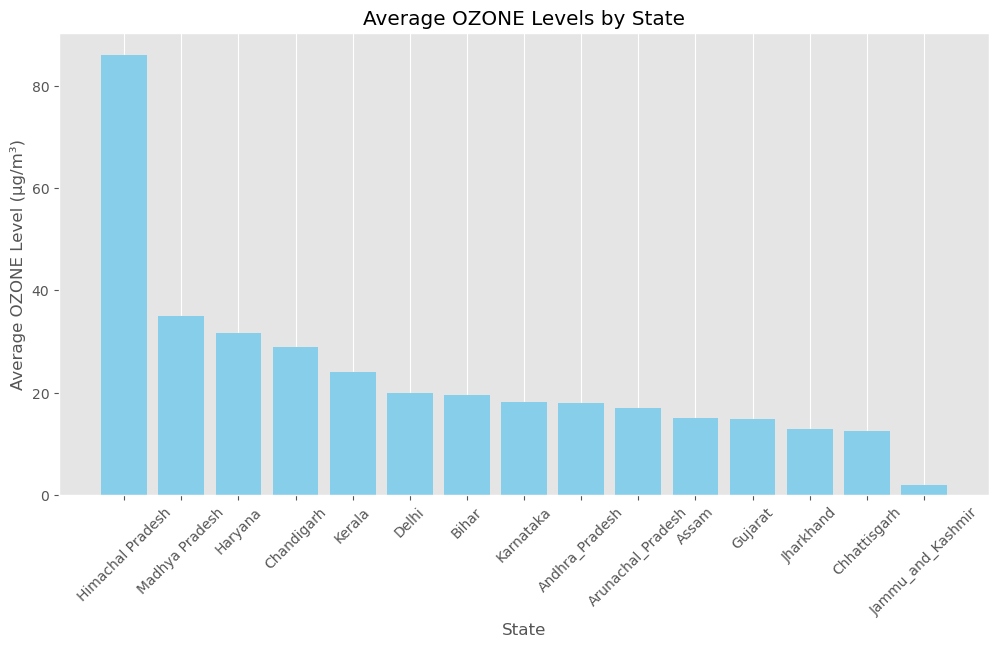

In [65]:
# State-wise comparison of average OZONE levels

state_comparison = df[df['pollutant_id'] == 'OZONE'].groupby('state')['pollutant_avg'].mean().reset_index()
state_comparison = state_comparison.sort_values(by='pollutant_avg', ascending=False)

# Plotting state-wise comparison
plt.figure(figsize=(12, 6))
plt.bar(state_comparison['state'], state_comparison['pollutant_avg'], color='skyblue')
plt.title('Average OZONE Levels by State')
plt.xlabel('State')
plt.ylabel('Average OZONE Level (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

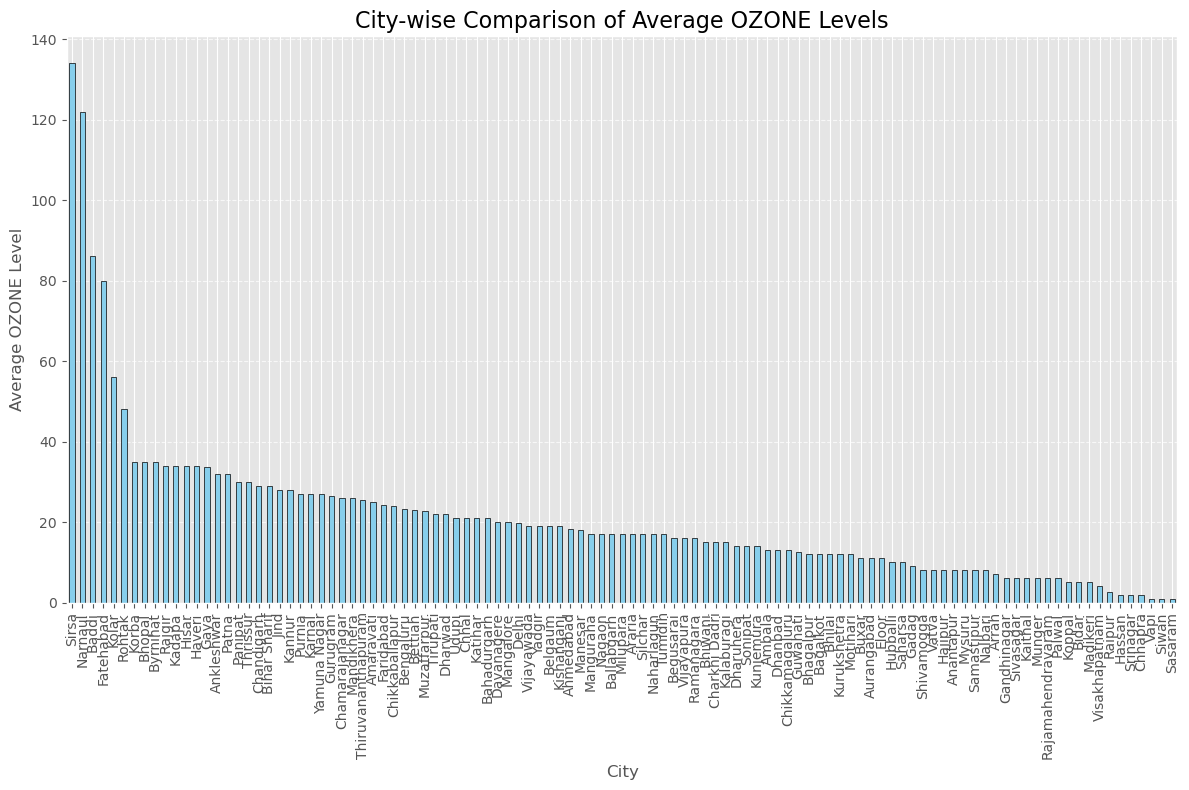

In [74]:
#City-wise comparison of average OZONE levels 

ozone_data = df[df['pollutant_id'] == 'OZONE']

# Step 4: Group by city and calculate the average OZONE levels
city_avg_ozone = ozone_data.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False)

# Step 5: Visualize the city-wise comparison of average OZONE levels
plt.figure(figsize=(12, 8))
city_avg_ozone.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('City-wise Comparison of Average OZONE Levels', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average OZONE Level', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


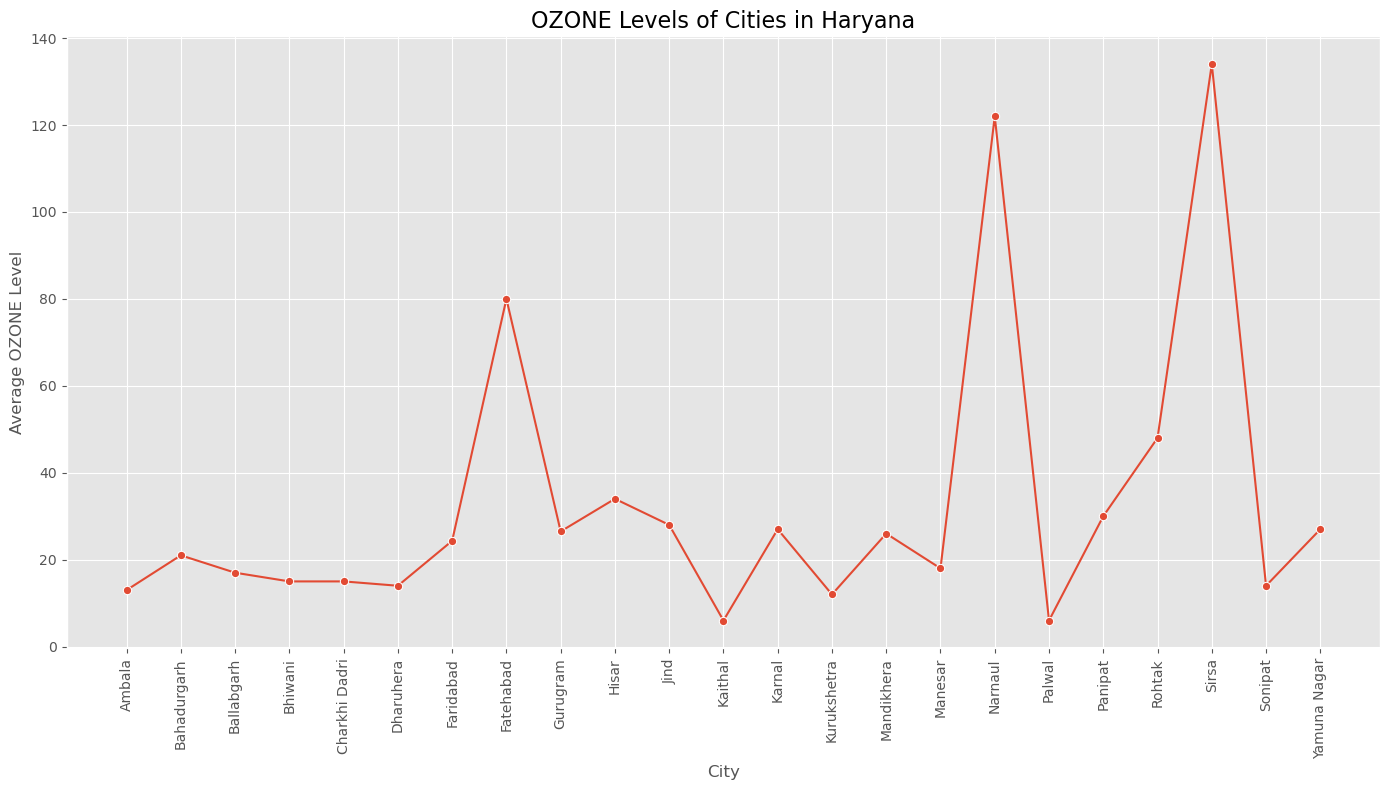

In [82]:
# Comparison of average OZONE levels of the cities of Haryana


state_name = 'Haryana'  # Replace with the state you are interested in
state_data = ozone_data[ozone_data['state'] == state_name]


city_avg_data = state_data.groupby('city')['pollutant_avg'].mean().reset_index()


plt.figure(figsize=(14, 8))
sns.lineplot(data=city_avg_data, x='city', y='pollutant_avg', marker='o')


plt.title(f'OZONE Levels of Cities in {state_name}', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average OZONE Level', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


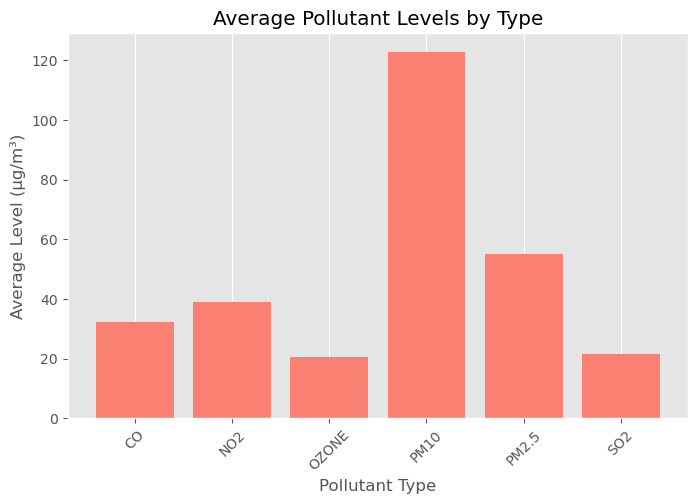

In [83]:
# Pollutant type comparison across all monitoring stations

pollutant_comparison = df.groupby('pollutant_id')['pollutant_avg'].mean().reset_index()


plt.figure(figsize=(8, 5))
plt.bar(pollutant_comparison['pollutant_id'], pollutant_comparison['pollutant_avg'], color='salmon')
plt.title('Average Pollutant Levels by Type')
plt.xlabel('Pollutant Type')
plt.ylabel('Average Level (µg/m³)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()